In [1]:
import os
# Donwload key from next line link to access the buckets and requester pays requests to public bucket (this is needed to query Sentinel-2 data)
os.environ["GS_NO_SIGN_REQUEST"] = "YES"

In [2]:
%%time
from georeader.readers import S2_SAFE_reader

safe_file = "S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE"
s2_safe_folder = S2_SAFE_reader.s2_public_bucket_path(safe_file, check_exists=False)

print(f"File is located at: {s2_safe_folder}")

s2obj = S2_SAFE_reader.s2loader(s2_safe_folder, out_res=10)
s2obj

/home/gonzalo/mambaforge/envs/marss2_vm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


File is located at: gs://gcp-public-data-sentinel-2/tiles/49/S/GV/S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE
CPU times: user 1.56 s, sys: 1.65 s, total: 3.22 s
Wall time: 7.83 s


 
         gs://gcp-public-data-sentinel-2/tiles/49/S/GV/S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE
         Transform: | 10.00, 0.00, 699960.00|
| 0.00,-10.00, 4000020.00|
| 0.00, 0.00, 1.00|
         Shape: (13, 10980, 10980)
         Resolution: (10.0, 10.0)
         Bounds: (699960.0, 3890220.0, 809760.0, 4000020.0)
         CRS: EPSG:32649
         bands: ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
         fill_value_default: 0
        

## Metadata files in Level 1C images

There are two metadata files (that I know) in Sentinel-2 Level 1C images, these are saved in the attributes
 * `s2obj.metadata_msi` 
 * `s2obj.metadata_tl`

In [3]:
s2obj.metadata_msi

'gs://gcp-public-data-sentinel-2/tiles/49/S/GV/S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE/MTD_MSIL1C.xml'

In [4]:
s2obj.metadata_tl

'gs://gcp-public-data-sentinel-2/tiles/49/S/GV/S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE/GRANULE/L1C_T49SGV_A027271_20220527T031740/MTD_TL.xml'

In [6]:
s2obj.read_metadata_tl()

In [7]:
s2obj.mean_saa

131.536377934938

In [8]:
s2obj.mean_sza

19.9963398909342

In [9]:
s2obj.mean_vaa

{'B01': 3.68625117058342,
 'B02': 3.0838728710074,
 'B03': 3.18946067411809,
 'B04': 3.29825904111417,
 'B05': 3.36911102353786,
 'B06': 3.44180307391012,
 'B07': 3.52146467178658,
 'B08': 3.13105485372435,
 'B8A': 3.60143308327063,
 'B09': 3.77484901438726,
 'B10': 3.2696304921444,
 'B11': 3.42988721523325,
 'B12': 3.61676668649388}

In [10]:
s2obj.mean_vza

{'B01': 126.71626827978,
 'B02': 134.025373678555,
 'B03': 131.374351951736,
 'B04': 129.400002573406,
 'B05': 128.353590682291,
 'B06': 127.731729632175,
 'B07': 127.498142587193,
 'B08': 132.434175716618,
 'B8A': 127.053148498046,
 'B09': 126.379870378688,
 'B10': 129.861408742839,
 'B11': 127.893230596876,
 'B12': 126.736610889672}

In [11]:
s2obj.vza["B12"]

 
         Transform: | 5000.00, 0.00, 699960.00|
| 0.00,-5000.00, 4000020.00|
| 0.00, 0.00, 1.00|
         Shape: (23, 23)
         Resolution: (5000.0, 5000.0)
         Bounds: (699960.0, 3885020.0, 814960.0, 4000020.0)
         CRS: EPSG:32649
         fill_value_default: 0
        

<Axes: title={'center': 'SAA'}>

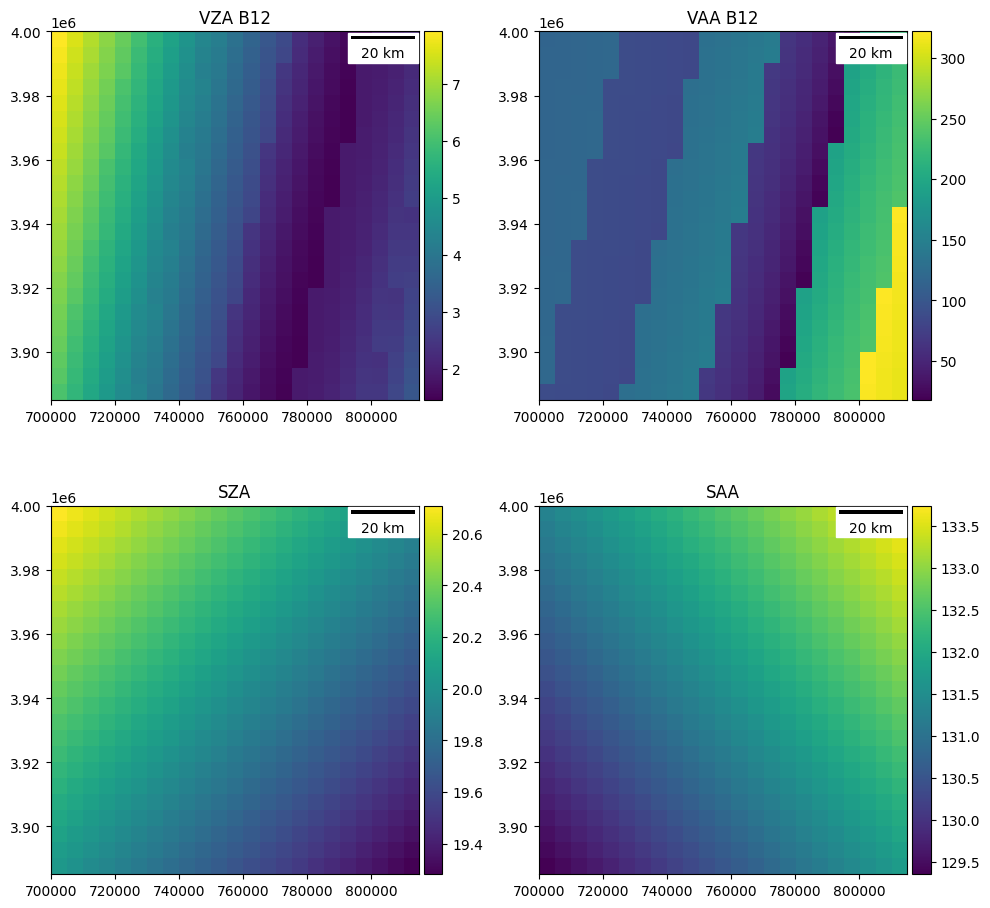

In [16]:
from georeader.plot import show
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2,figsize=(10,10), tight_layout=True)
show(s2obj.vza["B12"], add_colorbar_next_to=True, add_scalebar=True,
    ax=ax[0,0],title="VZA B12")
show(s2obj.vaa["B12"], add_colorbar_next_to=True, add_scalebar=True,
    ax=ax[0,1],title="VAA B12")
show(s2obj.sza, add_colorbar_next_to=True, add_scalebar=True,
    ax=ax[1,0],title="SZA")
show(s2obj.saa, add_colorbar_next_to=True, add_scalebar=True,
    ax=ax[1,1],title="SAA")

In [12]:
s2obj.saa

 
         Transform: | 5000.00, 0.00, 699960.00|
| 0.00,-5000.00, 4000020.00|
| 0.00, 0.00, 1.00|
         Shape: (23, 23)
         Resolution: (5000.0, 5000.0)
         Bounds: (699960.0, 3885020.0, 814960.0, 4000020.0)
         CRS: EPSG:32649
         fill_value_default: 0
        

In [13]:
s2obj

 
         gs://gcp-public-data-sentinel-2/tiles/49/S/GV/S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE
         Transform: | 10.00, 0.00, 699960.00|
| 0.00,-10.00, 4000020.00|
| 0.00, 0.00, 1.00|
         Shape: (13, 10980, 10980)
         Resolution: (10.0, 10.0)
         Bounds: (699960.0, 3890220.0, 809760.0, 4000020.0)
         CRS: EPSG:32649
         bands: ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
         fill_value_default: 0
        

### Reflectance to radiance conversion

We want the pixels of our images in [**spectral radiances**](https://en.wikipedia.org/wiki/Radiance) with units $W·sr^{-1}·m^{−2}·nm^{−1}$. Spectral raciances are (*watts per steradian per square meter per nanometer*).

According to this https://gis.stackexchange.com/questions/285996/convert-sentinel-2-1c-product-from-reflectance-to-radiance the formula to convert digital numbers (DN) in ToA images is:

toaBandX = (pixelValueBandX + radioAddOffsetBandX ) / 10000

radianceBandX = ((toaBandX * cos(incidenceAngle) * solarIrradianceBandX) / (pi * d2))

where d2 is the earth-sun distance correction. d2 is 1.0/U

The values for incidenceAngle, solarIrradianceBandX and U can be found in the 2 metadata files included in the download.

* In `metadata_msi` we can find the `solarIrradianceBandX`, the `radioAddOffsetBandX` and `U`. See xml content bellow!
* In `metadata_tl` we can find the `incidenceAngle` (which I assume is the solar zenith angle). 

If $J$ is the Julian day of the day of acquisition (day of the year), d2 can be computed as:

d2 = (1-e* cos(0.9856 * (J-4) * pi/180))^2

Where e=0.01673 is the Earth's orbit eccentricity

In [5]:
import fsspec
with fsspec.open(s2obj.metadata_msi,"r") as fh:
    content = fh.read()
print(content)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<n1:Level-1C_User_Product xmlns:n1="https://psd-14.sentinel2.eo.esa.int/PSD/User_Product_Level-1C.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="https://psd-14.sentinel2.eo.esa.int/PSD/User_Product_Level-1C.xsd">
    <n1:General_Info>
        <Product_Info>
            <PRODUCT_START_TIME>2022-05-27T03:05:39.024Z</PRODUCT_START_TIME>
            <PRODUCT_STOP_TIME>2022-05-27T03:05:39.024Z</PRODUCT_STOP_TIME>
            <PRODUCT_URI>S2B_MSIL1C_20220527T030539_N0400_R075_T49SGV_20220527T051042.SAFE</PRODUCT_URI>
            <PROCESSING_LEVEL>Level-1C</PROCESSING_LEVEL>
            <PRODUCT_TYPE>S2MSI1C</PRODUCT_TYPE>
            <PROCESSING_BASELINE>04.00</PROCESSING_BASELINE>
            <PRODUCT_DOI>https://doi.org/10.5270/S2_-742ikth</PRODUCT_DOI>
            <GENERATION_TIME>2022-05-27T05:10:42.000000Z</GENERATION_TIME>
            <PREVIEW_IMAGE_URL>Not applicable</PREVIEW_IMAGE_URL>
            

Solar irradiance values, U and radio offsets are in the `s2obj.metadata_msi` file. 


```
[...]
           <QUANTIFICATION_VALUE unit="none">10000</QUANTIFICATION_VALUE>
           <Radiometric_Offset_List>
        <RADIO_ADD_OFFSET band_id="0">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="1">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="2">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="3">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="4">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="5">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="6">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="7">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="8">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="9">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="10">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="11">-1000</RADIO_ADD_OFFSET>
        <RADIO_ADD_OFFSET band_id="12">-1000</RADIO_ADD_OFFSET>
      </Radiometric_Offset_List>
            <Reflectance_Conversion>
        <U>0.975631110815927</U>
        <Solar_Irradiance_List>
          <SOLAR_IRRADIANCE bandId="0" unit="W/m²/µm">1874.3</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="1" unit="W/m²/µm">1959.75</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="2" unit="W/m²/µm">1824.93</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="3" unit="W/m²/µm">1512.79</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="4" unit="W/m²/µm">1425.78</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="5" unit="W/m²/µm">1291.13</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="6" unit="W/m²/µm">1175.57</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="7" unit="W/m²/µm">1041.28</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="8" unit="W/m²/µm">953.93</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="9" unit="W/m²/µm">817.58</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="10" unit="W/m²/µm">365.41</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="11" unit="W/m²/µm">247.08</SOLAR_IRRADIANCE>
          <SOLAR_IRRADIANCE bandId="12" unit="W/m²/µm">87.75</SOLAR_IRRADIANCE>
        </Solar_Irradiance_List>
</Reflectance_Conversion>
[...]
```

In that file there's also the spectral response of each of the bands:

```
[...]
            <Spectral_Information_List>
        <Spectral_Information bandId="0" physicalBand="B1">
          <RESOLUTION>60</RESOLUTION>
          <Wavelength>
            <MIN unit="nm">411</MIN>
            <MAX unit="nm">456</MAX>
            <CENTRAL unit="nm">442.3</CENTRAL>
          </Wavelength>
          <Spectral_Response>
            <STEP unit="nm">1</STEP>
            <VALUES>0.0062411 0.01024045 0.00402983 0.00642179 0.00552753 0.0065525 0.00409887 0.006297 0.00436742 0.00233356 0.00058162 0.00202276 0.00294328 0.00485362 0.00317041 0.00237657 0.00234612 0.00440152 0.01292397 0.05001678 0.18650104 0.45441623 0.72307877 0.83999211 0.86456334 0.87472096 0.89215296 0.91090814 0.92588017 0.93924094 0.94491826 0.95078529 0.96803023 0.99939195 1 0.97548364 0.96148351 0.94986211 0.91841452 0.87989802 0.80383677 0.59752075 0.30474132 0.10798014 0.0304465 0.00885119</VALUES>
          </Spectral_Response>
        </Spectral_Information>
        <Spectral_Information bandId="1" physicalBand="B2">
        
[...]
```

In [6]:
root_msi = S2_SAFE_reader.read_xml(s2obj.metadata_msi)

In [7]:
radio_add_offsets = root_msi.findall(".//RADIO_ADD_OFFSET")
for r in radio_add_offsets:
    print(r, r.attrib["band_id"],r.text)

<Element 'RADIO_ADD_OFFSET' at 0x7efe118124d0> 0 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe11812520> 1 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe11812570> 2 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe118125c0> 3 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe11812610> 4 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe11812660> 5 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe118126b0> 6 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe11812700> 7 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe11812750> 8 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe118127a0> 9 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe118127f0> 10 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe11812840> 11 -1000
<Element 'RADIO_ADD_OFFSET' at 0x7efe11812890> 12 -1000


In [8]:
root_msi.find(".//QUANTIFICATION_VALUE").text

'10000'

In [9]:
bands_elms = root_msi.findall(".//IMAGE_FILE")
for b in bands_elms:
    print(b, b.text)

<Element 'IMAGE_FILE' at 0x7efe11811800> GRANULE/L1C_T49SGV_A027271_20220527T031740/IMG_DATA/T49SGV_20220527T030539_B01
<Element 'IMAGE_FILE' at 0x7efe11811850> GRANULE/L1C_T49SGV_A027271_20220527T031740/IMG_DATA/T49SGV_20220527T030539_B02
<Element 'IMAGE_FILE' at 0x7efe118118a0> GRANULE/L1C_T49SGV_A027271_20220527T031740/IMG_DATA/T49SGV_20220527T030539_B03
<Element 'IMAGE_FILE' at 0x7efe118118f0> GRANULE/L1C_T49SGV_A027271_20220527T031740/IMG_DATA/T49SGV_20220527T030539_B04
<Element 'IMAGE_FILE' at 0x7efe11811940> GRANULE/L1C_T49SGV_A027271_20220527T031740/IMG_DATA/T49SGV_20220527T030539_B05
<Element 'IMAGE_FILE' at 0x7efe11811990> GRANULE/L1C_T49SGV_A027271_20220527T031740/IMG_DATA/T49SGV_20220527T030539_B06
<Element 'IMAGE_FILE' at 0x7efe118119e0> GRANULE/L1C_T49SGV_A027271_20220527T031740/IMG_DATA/T49SGV_20220527T030539_B07
<Element 'IMAGE_FILE' at 0x7efe11811a30> GRANULE/L1C_T49SGV_A027271_20220527T031740/IMG_DATA/T49SGV_20220527T030539_B08
<Element 'IMAGE_FILE' at 0x7efe11811a80>

In [10]:
radio_add_offsets = root_msi.findall(".//SOLAR_IRRADIANCE")
for r in radio_add_offsets:
    print(r, r.attrib["bandId"],r.text)

<Element 'SOLAR_IRRADIANCE' at 0x7efe11812b10> 0 1874.3
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812b60> 1 1959.75
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812bb0> 2 1824.93
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812c00> 3 1512.79
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812c50> 4 1425.78
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812ca0> 5 1291.13
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812cf0> 6 1175.57
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812d40> 7 1041.28
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812d90> 8 953.93
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812de0> 9 817.58
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812e30> 10 365.41
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812e80> 11 247.08
<Element 'SOLAR_IRRADIANCE' at 0x7efe11812ed0> 12 87.75


In [11]:
import fsspec
with fsspec.open(s2obj.metadata_tl,"r") as fh:
    content_tl = fh.read()
print(content_tl)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<n1:Level-1C_Tile_ID xmlns:n1="https://psd-14.sentinel2.eo.esa.int/PSD/S2_PDI_Level-1C_Tile_Metadata.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="https://psd-14.sentinel2.eo.esa.int/PSD/S2_PDI_Level-1C_Tile_Metadata.xsd /dpc/app/s2ipf/FORMAT_METADATA_TILE_L1C/05.01.01/scripts/../../../schemas/14.08.01/PSD/S2_PDI_Level-1C_Tile_Metadata.xsd">

  <n1:General_Info>
    <TILE_ID metadataLevel="Brief">S2B_OPER_MSI_L1C_TL_2BPS_20220527T051042_A027271_T49SGV_N04.00</TILE_ID>
    <DATASTRIP_ID metadataLevel="Standard">S2B_OPER_MSI_L1C_DS_2BPS_20220527T051042_S20220527T031740_N04.00</DATASTRIP_ID>
    <DOWNLINK_PRIORITY metadataLevel="Standard">NOMINAL</DOWNLINK_PRIORITY>
    <SENSING_TIME metadataLevel="Standard">2022-05-27T03:18:06.104985Z</SENSING_TIME>
    <Archiving_Info metadataLevel="Expertise">
      <ARCHIVING_CENTRE>2BPS</ARCHIVING_CENTRE>
      <ARCHIVING_TIME>2022-05-27T06:18:21.566691Z</ARCHIVIN

In [ ]:
s2obj.transform

In [ ]:
s2obj.ulxyByRes

In [ ]:
s2obj.sunZenithGrid.shape

In [ ]:
s2obj.sunAzimuthGrid.shape

In [ ]:
s2obj.shape[1]/23

In [ ]:
s2obj.angleGridXres

In [ ]:
s2obj.viewZenithDict.keys()

In [ ]:
s2obj

In [ ]:
viewingAngleNodeList = s2obj.tileAnglesNode.findall('Viewing_Incidence_Angles_Grids')
len(viewingAngleNodeList)

In [ ]:
for vand in viewingAngleNodeList:
    bandId = vand.attrib['bandId']
    detectorId = vand.attrib['detectorId']
    print(f"Band: {bandId} Detector: {detectorId}")